In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [2]:
#!pip install torch torchvision


In [3]:
!kaggle datasets download -d alessiocorrado99/animals10 -p ./raw-img --unzip

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 1741, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
             ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'username'


In [4]:
dataset_name = 'alessiocorrado99/animals10'
zip_name = dataset_name.split('/')[-1]
!kaggle datasets download -d {dataset_name}
!unzip -q ./{zip_name} -d ~/Dataset

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 1741, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
             ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'username'
unzip:  cannot find or open ./animals10, ./animals10.zip or ./animals10.ZIP.


In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("alessiocorrado99/animals10")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/animals10


In [6]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])
dataset = datasets.ImageFolder("/kaggle/input/animals10", transform=transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

In [7]:
from torchvision.datasets import ImageFolder
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

dataset = ImageFolder('/kaggle/input/animals10/raw-img', transform=transform)

In [8]:
from torch.utils.data import random_split

train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size

train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

In [9]:
from torch.utils.data import DataLoader

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)

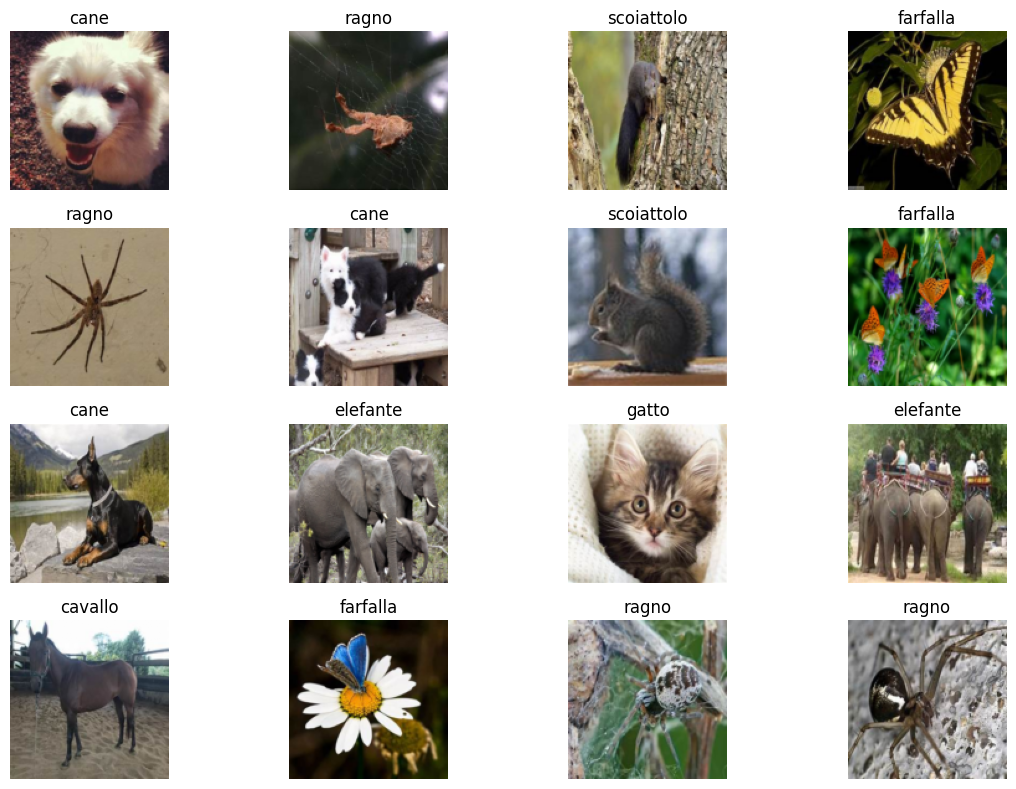

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision

# Get class names
class_names = dataset.classes

# Create a DataLoader (just for visualization)
data_loader = DataLoader(dataset, batch_size=16, shuffle=True)

# Get one batch
images, labels = next(iter(data_loader))

# Convert tensors to NumPy and plot
plt.figure(figsize=(12, 8))
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    img = images[i].permute(1, 2, 0).numpy()  # CxHxW → HxWxC
    plt.imshow(img)
    plt.title(class_names[labels[i]])
    plt.axis("off")

plt.tight_layout()
plt.show()


In [11]:
import os

class_map = {
    "cane": "dog", "cavallo": "horse", "elefante": "elephant",
    "farfalla": "butterfly", "gallina": "chicken", "gatto": "cat",
    "mucca": "cow", "pecora": "sheep", "scoiattolo": "squirrel"
}

# After loading dataset
class_names = [class_map.get(cls, cls) for cls in dataset.classes]
print(class_names)

['dog', 'horse', 'elephant', 'butterfly', 'chicken', 'cat', 'cow', 'sheep', 'ragno', 'squirrel']


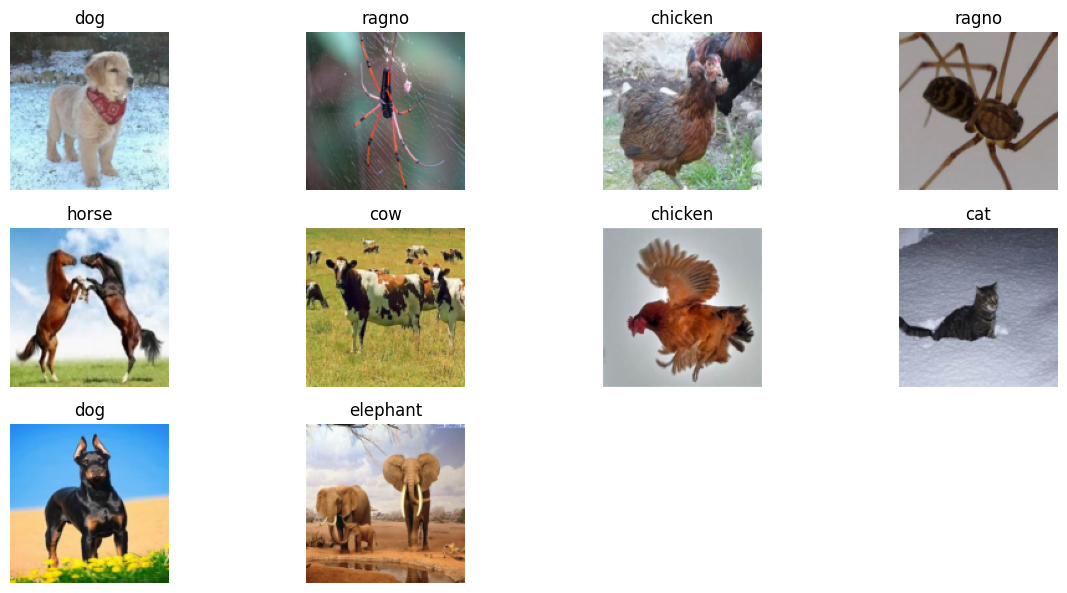

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader

# Translation dictionary: Italian → English
translate = {
    "cane": "dog", "cavallo": "horse", "elefante": "elephant",
    "farfalla": "butterfly", "gallina": "chicken", "gatto": "cat",
    "mucca": "cow", "pecora": "sheep", "scoiattolo": "squirrel"
}

# Get class names and map to English
class_names = [translate.get(name, name) for name in dataset.classes]

dataset.classes = class_names
# Create a DataLoader (just for visualization)
data_loader = DataLoader(dataset, batch_size=16, shuffle=True)

# Get one batch
images, labels = next(iter(data_loader))

# Plot images with English class names
plt.figure(figsize=(12, 8))
for i in range(10):
    ax = plt.subplot(4, 4, i + 1)
    img = images[i].permute(1, 2, 0).numpy()
    plt.imshow(img)
    plt.title(class_names[labels[i]])
    plt.axis("off")

plt.tight_layout()
plt.show()


In [13]:
from torch.utils.data import random_split

# 80% train, 20% test
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_ds, test_ds = random_split(dataset, [train_size, test_size])

In [14]:
from torch.utils.data import DataLoader

train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
test_loader = DataLoader(test_ds, batch_size=32, shuffle=False)

In [15]:
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize to [-1, 1]
])

Checkpoint

In [16]:


#from tensorflow.keras.utils import to_categorical

#y_train = to_categorical(y_train, num_classes=10)
#y_test = to_categorical(y_test, num_classes=10)

#print(y_train.shape)
#print(y_test.shape)




In [17]:
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD
from keras.backend import clear_session

# Force TensorFlow to use CPU only
# This often resolves GPU initialization issues
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

# Or alternatively, limit GPU memory growth
# gpus = tf.config.experimental.list_physical_devices('GPU')
# if gpus:
#     try:
#         for gpu in gpus:
#             tf.config.experimental.set_memory_growth(gpu, True)
#     except RuntimeError as e:
#         print(e)

# Clear any previous Keras session
clear_session()
tf.keras.backend.clear_session()

# Set your dataset path
dataset_path = "/kaggle/input/animals10/raw-img"

# Image parameters
img_size = (28, 28)
batch_size = 32

# Load dataset from folders
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    labels='inferred',
    label_mode='int',
    image_size=img_size,
    batch_size=None,
    shuffle=True
)

# Convert to NumPy arrays
x = []
y = []
for img, label in dataset:
    x.append(img.numpy())
    y.append(label.numpy())

x = np.array(x)
y = np.array(y)
print("x shape:", x.shape)
print("y shape:", y.shape)

# Normalize pixel values
x = x / 255.0

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)
print("Train:", x_train.shape, y_train.shape)
print("Test:", x_test.shape, y_test.shape)

# One-hot encode the labels
y_train_onehot = to_categorical(y_train, 10)
y_test_onehot = to_categorical(y_test, 10)
print("One-hot train label shape:", y_train_onehot.shape)
print("One-hot test label shape:", y_test_onehot.shape)

# Define a simpler model to reduce memory requirements
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),  # Reduced from 128
    Dense(10, activation='softmax')
])

# Compile model
model.compile(
    loss='categorical_crossentropy',
    optimizer=SGD(learning_rate=0.01),
    metrics=['accuracy']
)

# Print model summary
model.summary()

# Train with smaller batch size and fewer epochs
history = model.fit(
    x_train, y_train_onehot,
    epochs=10,  # Reduced from 20
    batch_size=32,  # Reduced from 64
    validation_data=(x_test, y_test_onehot),
    verbose=1
)

Found 26179 files belonging to 10 classes.
x shape: (26179, 28, 28, 3)
y shape: (26179,)
Train: (20943, 28, 28, 3) (20943,)
Test: (5236, 28, 28, 3) (5236,)
One-hot train label shape: (20943, 10)
One-hot test label shape: (5236, 10)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 57,002 (222.66 KB)

 Trainable params: 57,002 (222.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.1679 - loss: 2.2450 - val_accuracy: 0.2366 - val_loss: 2.1639
Epoch 2/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.2244 - loss: 2.1481 - val_accuracy: 0.2538 - val_loss: 2.1072
Epoch 3/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.2645 - loss: 2.0783 - val_accuracy: 0.3102 - val_loss: 2.0400
Epoch 4/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.3100 - loss: 1.9828 - val_accuracy: 0.3149 - val_loss: 1.9220
Epoch 5/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.3473 - loss: 1.8697 - val_accuracy: 0.3094 - val_loss: 1.9166
Epoch 6/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.3770 - loss: 1.7836 - val_accuracy: 0.4144 - val_loss: 1.7056
Epoch 7/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.4034 - loss: 1.7047 - val_accuracy: 0.3749 - val_loss: 1.8193
Epoch 8/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.4360 - loss: 1.6415 - val_accuracy: 0.